# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [11]:
!pip install tabula-py

   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.0 MB 8.3 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.0 MB 12.1 MB/s eta 0:00:01
   ------------------------- -------------- 7.6/12.0 MB 13.0 MB/s eta 0:00:01
   ------------------------------------ --- 11.0/12.0 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 12.7 MB/s eta 0:00:00


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabula

In [23]:
df_sinasc = pd.read_csv('Profissão Cientista de Dados M6 - SINASC_RO_2019.csv')
dic = tabula.read_pdf('Profissão Cientista de Dados M6 - SINASC.pdf')

'pages' argument isn't specified.Will extract only from page 1 by default.


####  2) Monte um gráfico de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

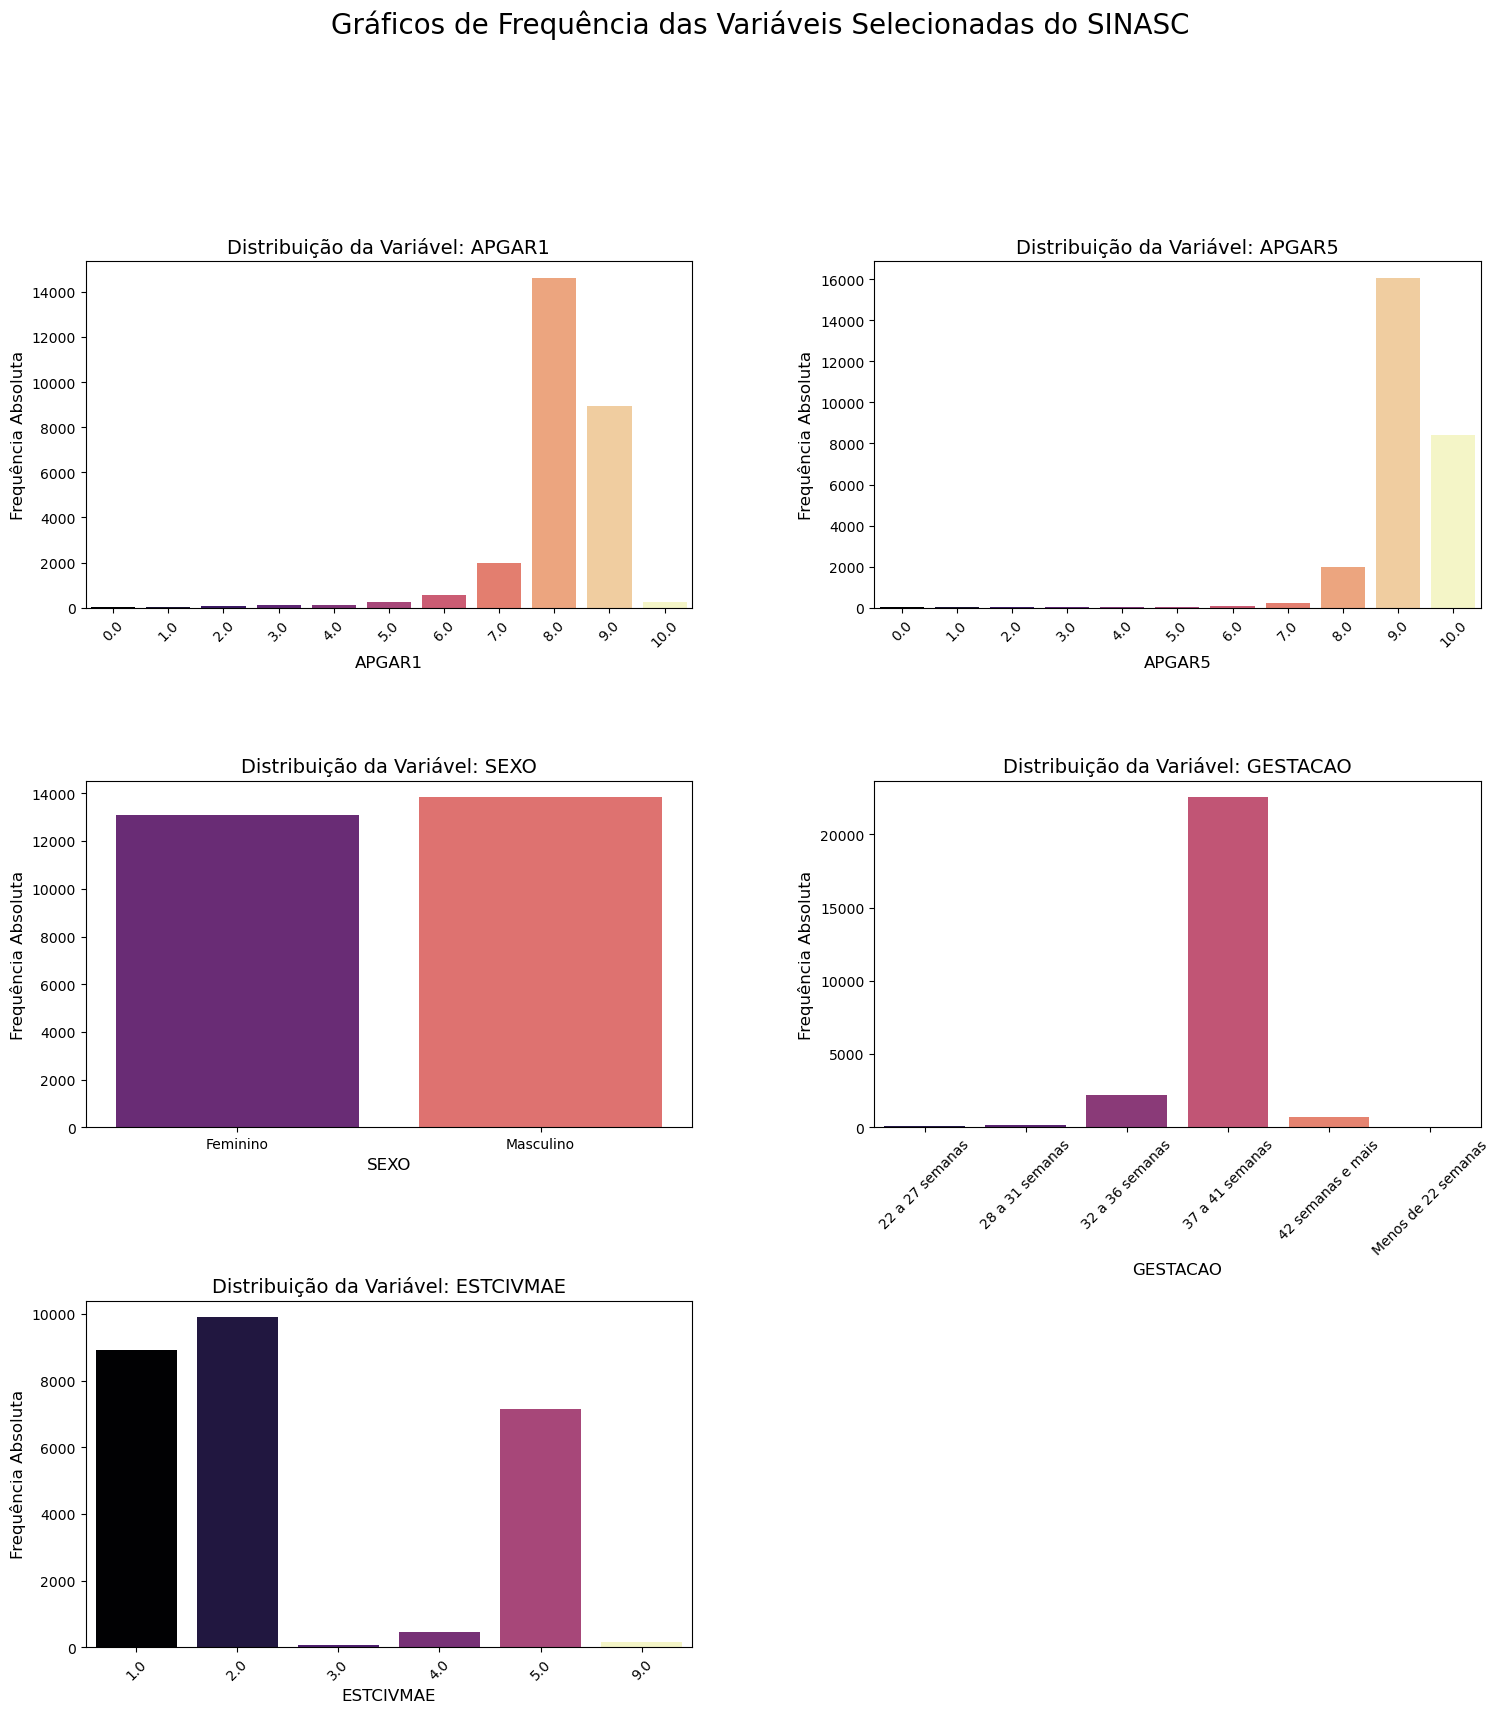

In [36]:
# Colunas de interesse
colunas_interesse = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# Criar o DataFrame de trabalho 
df_trabalho = df_sinasc[colunas_interesse].copy()

# Verificar se a coluna APGAR5 não tem NaN antes de contar
df_trabalho.dropna(subset=['APGAR5'], inplace=True)

# Geração dos Gráficos

# Criar uma figura com 5 subplots 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Lista de eixos para iterar
axes_flat = axes.flatten()
plt.delaxes(axes_flat[-1]) # Remove o último subplot, pois só temos 5 gráficos

for i, coluna in enumerate(colunas_interesse):
    # Calcular a frequência e ordenar pelo índice (categoria)
    contagem = df_trabalho[coluna].value_counts().sort_index()
    
    # Criar o gráfico de barras
    ax = sns.barplot(
    x=contagem.index, 
    y=contagem.values, 
    hue=contagem.index,  
    ax=axes_flat[i], 
    palette="magma",
    legend=False        
)
    
    # Configurações do gráfico
    ax.set_title(f'Distribuição da Variável: {coluna}', fontsize=14)
    ax.set_xlabel(coluna, fontsize=12)
    ax.set_ylabel('Frequência Absoluta', fontsize=12)
    
    # Rotacionar rótulos do eixo X se houver muitas categorias (especialmente para GESTACAO e ESTCIVMAE)
    if len(contagem) > 4:
        ax.tick_params(axis='x', rotation=45)

plt.suptitle('Gráficos de Frequência das Variáveis Selecionadas do SINASC', fontsize=20, y=1.02)
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

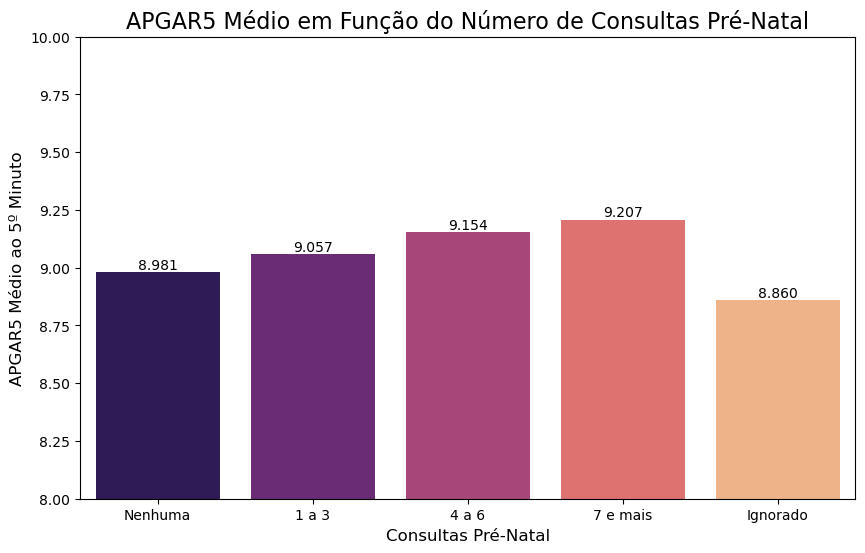

In [43]:
# Colunas de interesse
colunas_interesse = ['APGAR5', 'CONSULTAS']

# Criar um DataFrame de trabalho e remover NaN para as colunas de interesse
df_apgar_consultas = df_sinasc[colunas_interesse].dropna().copy()

# Ajustar a coluna CONSULTAS para usar a descrição de códigos correta
mapeamento_consultas = {
    1: 'Nenhuma',
    2: '1 a 3',
    3: '4 a 6',
    4: '7 e mais',
    9: 'Ignorado'
}
df_apgar_consultas['CONSULTAS_DESCRICAO'] = df_apgar_consultas['CONSULTAS'].map(mapeamento_consultas)

# 2. Calcular o APGAR5 médio por categoria de CONSULTAS
apgar5_medio_por_consulta = df_apgar_consultas.groupby('CONSULTAS_DESCRICAO')['APGAR5'].mean().reset_index()

# Ordenar as categorias para que o gráfico faça sentido (Ignorado e Nenhuma no final)
ordem_consultas = ['Nenhuma', '1 a 3', '4 a 6', '7 e mais', 'Ignorado']
apgar5_medio_por_consulta['CONSULTAS_DESCRICAO'] = pd.Categorical(
    apgar5_medio_por_consulta['CONSULTAS_DESCRICAO'], 
    categories=ordem_consultas, 
    ordered=True
)
apgar5_medio_por_consulta.sort_values('CONSULTAS_DESCRICAO', inplace=True)

# Geração do Gráfico de Barras

plt.figure(figsize=(10, 6))

# Montar o gráfico de barras com a média de APGAR5
ax = sns.barplot(
    data=apgar5_medio_por_consulta,
    x='CONSULTAS_DESCRICAO',
    y='APGAR5',
    hue='CONSULTAS_DESCRICAO',
    palette='magma',
    legend=False
)

# Configurações e Títulos
plt.title('APGAR5 Médio em Função do Número de Consultas Pré-Natal', fontsize=16)
plt.xlabel('Consultas Pré-Natal', fontsize=12)
plt.ylabel('APGAR5 Médio ao 5º Minuto', fontsize=12)
plt.ylim(8.0, 10.0) # Limitar o eixo Y para realçar pequenas diferenças
plt.xticks(rotation=0)

# Adicionar o valor médio em cima de cada barra (para clareza)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

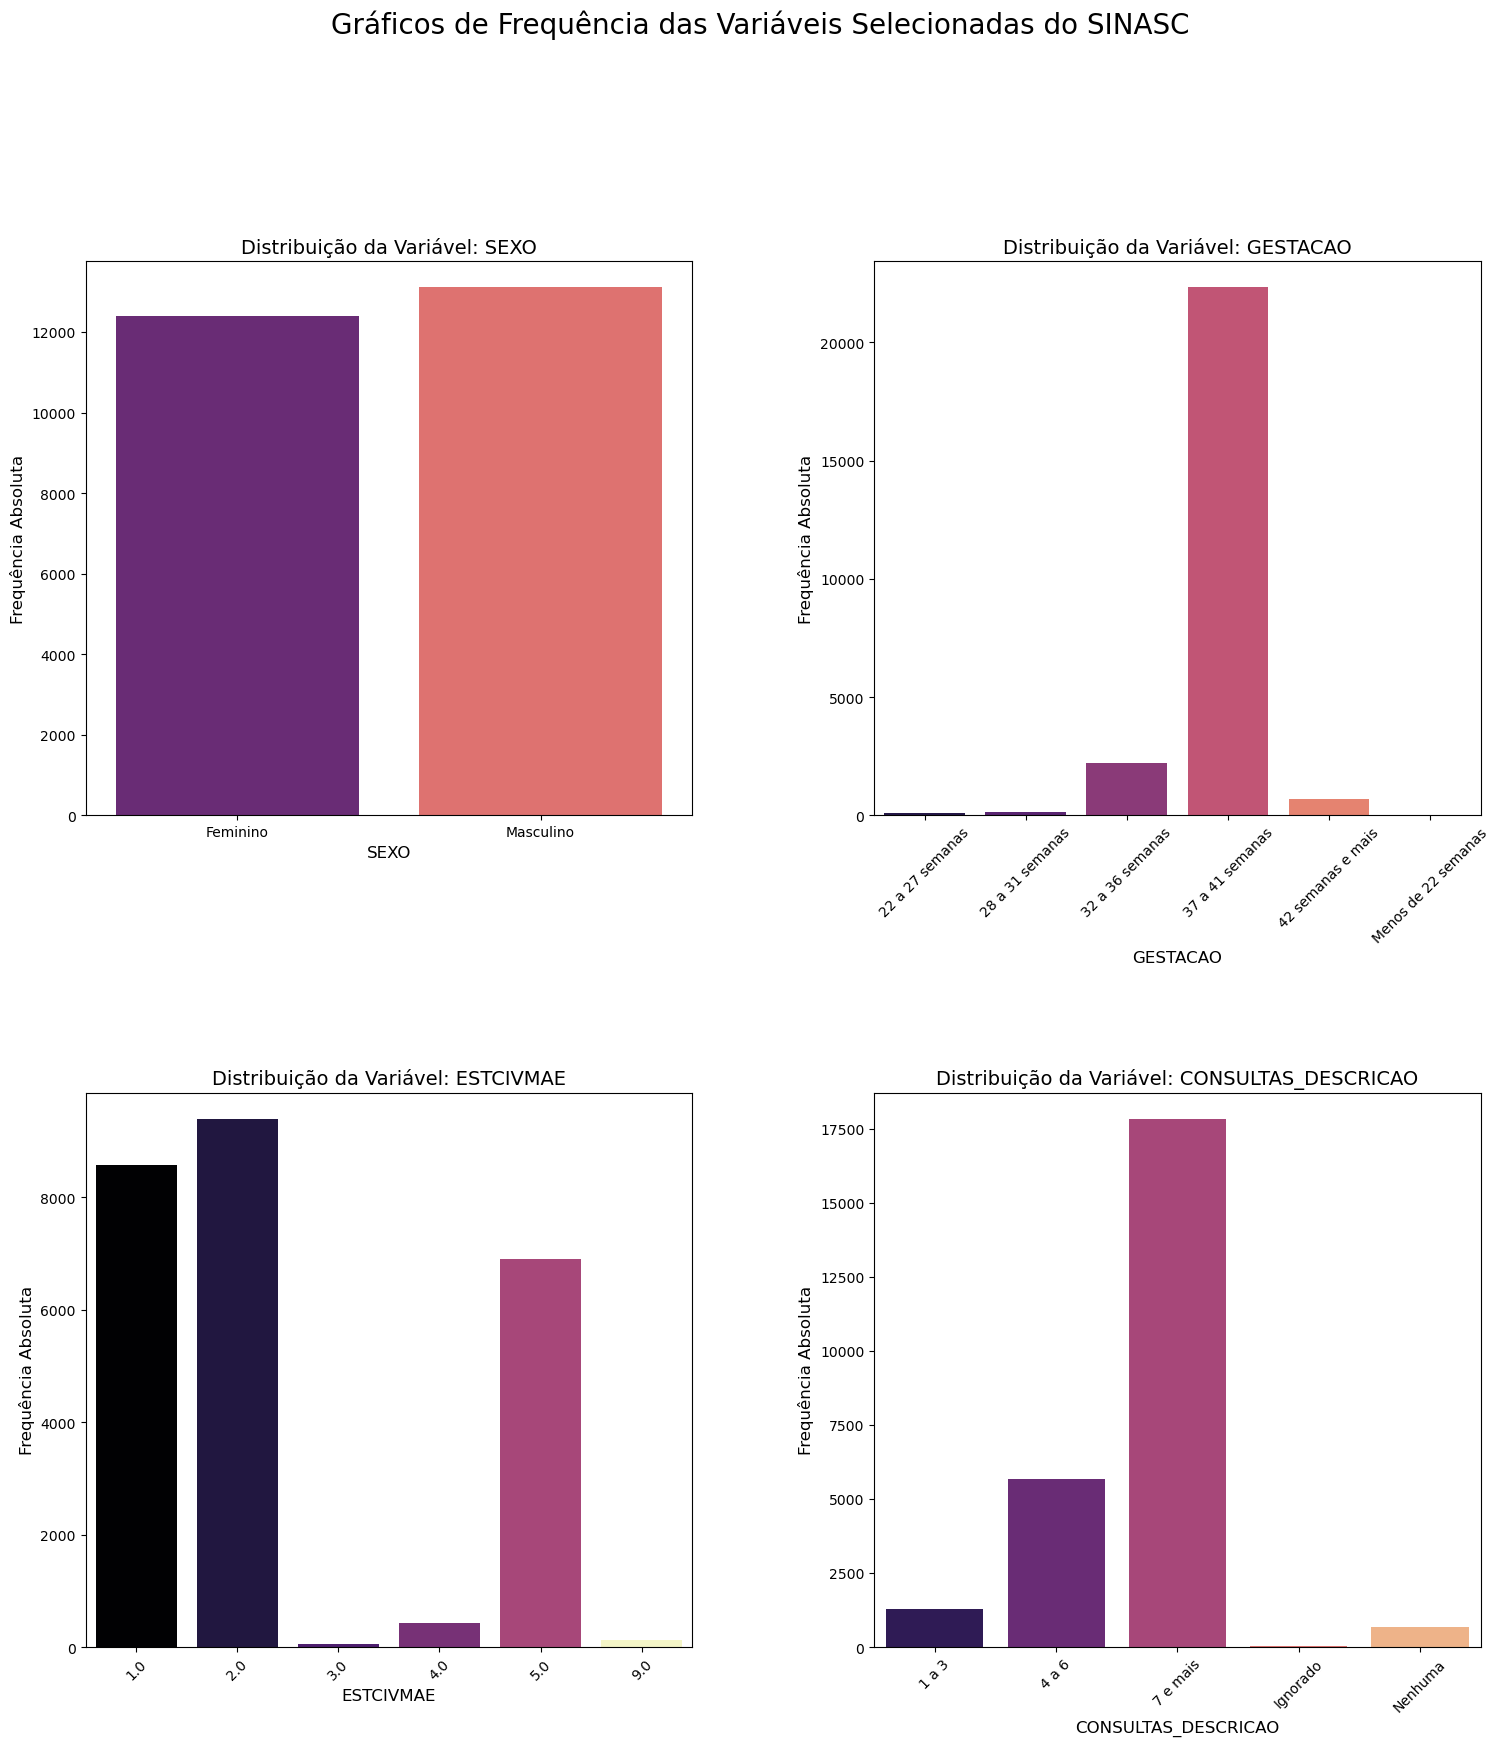

In [45]:
# Colunas de interesse 
colunas_interesse = ['SEXO', 'GESTACAO', 'ESTCIVMAE']
# Como a coluna CONSULTAS traz dados descritivos, ela será adicionada posteriormente

# Criar um DataFrame de trabalho e remover NaN para as colunas de interesse
df_painel = df_sinasc[colunas_interesse + ['CONSULTAS']].dropna().copy() 

# Ajustar a coluna CONSULTAS para usar a descrição de códigos correta
mapeamento_consultas = { 
    1: 'Nenhuma', 
    2: '1 a 3', 
    3: '4 a 6', 
    4: '7 e mais', 
    9: 'Ignorado' 
} 
df_painel['CONSULTAS_DESCRICAO'] = df_painel['CONSULTAS'].map(mapeamento_consultas) 

# Adicionar a coluna de descrição à lista de interesse para ser plotada
colunas_interesse.append('CONSULTAS_DESCRICAO')

# Geração dos Gráficos

# Criar uma figura com 5 subplots 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Lista de eixos para iterar
axes_flat = axes.flatten()

for i, coluna in enumerate(colunas_interesse):
    # Calcular a frequência e ordenar pelo índice (categoria)
    contagem = df_painel[coluna].value_counts().sort_index()
    
    # Criar o gráfico de barras
    ax = sns.barplot(
    x=contagem.index, 
    y=contagem.values, 
    hue=contagem.index,  
    ax=axes_flat[i], 
    palette="magma",
    legend=False        
)
    
    # Configurações do gráfico
    ax.set_title(f'Distribuição da Variável: {coluna}', fontsize=14)
    ax.set_xlabel(coluna, fontsize=12)
    ax.set_ylabel('Frequência Absoluta', fontsize=12)
    
    # Rotacionar rótulos do eixo X se houver muitas categorias (especialmente para GESTACAO e ESTCIVMAE)
    if len(contagem) > 4:
        ax.tick_params(axis='x', rotation=45)

plt.suptitle('Gráficos de Frequência das Variáveis Selecionadas do SINASC', fontsize=20, y=1.02)
plt.show()